In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('medical.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No


In [4]:
df.describe()

,PatientId,AppointmentID,Age,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000


In [5]:
df.isnull().any(axis=1)

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

In [6]:
df.isnull().any(axis=0)

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
SMS_received      False
No-show           False
dtype: bool

In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
SMS_received      0
No-show           0
dtype: int64

In [8]:
df.describe()

,PatientId,AppointmentID,Age,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000
mean,1.474961e+14,5.675305e+06,37.088874,0.321026
std,2.560943e+14,7.129575e+04,23.110205,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000
25%,4.170000e+12,5.640286e+06,18.000000,0.000000
50%,3.170000e+13,5.680573e+06,37.000000,0.000000
75%,9.440000e+13,5.725524e+06,55.000000,1.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000


In [9]:
df = df[df.Age >= 0]

In [10]:
df.Age.min() # df['Age'].min()

np.int64(0)

In [11]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,No


In [12]:
df['No-show'] = df['No-show'].map({'Yes':1, 'No':0})
df['No-show'].value_counts()

No-show
0    88207
1    22319
Name: count, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110526 non-null  float64
 1   AppointmentID   110526 non-null  int64  
 2   Gender          110526 non-null  object 
 3   ScheduledDay    110526 non-null  object 
 4   AppointmentDay  110526 non-null  object 
 5   Age             110526 non-null  int64  
 6   Neighbourhood   110526 non-null  object 
 7   SMS_received    110526 non-null  int64  
 8   No-show         110526 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 8.4+ MB


In [14]:
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   SMS_received    110526 non-null  int64              
 8   No-show         110526 non-null  int64              
dtypes: datetime64[ns, UTC](2), float64(1), int64(4), object(2)
memory usage: 8.4+ MB


In [15]:
df['waiting_day'] = df['AppointmentDay'].dt.dayofyear-df['ScheduledDay'].dt.dayofyear
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 110526 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   AppointmentID   110526 non-null  int64              
 2   Gender          110526 non-null  object             
 3   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 5   Age             110526 non-null  int64              
 6   Neighbourhood   110526 non-null  object             
 7   SMS_received    110526 non-null  int64              
 8   No-show         110526 non-null  int64              
 9   waiting_day     110526 non-null  int32              
dtypes: datetime64[ns, UTC](2), float64(1), int32(1), int64(4), object(2)
memory usage: 8.9+ MB


In [16]:
df.describe()

,PatientId,AppointmentID,Age,SMS_received,No-show,waiting_day
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474932e+14,5.675304e+06,37.089219,0.321029,0.201934,9.979046
std,2.560937e+14,7.129544e+04,23.110026,0.466874,0.401445,15.607516
min,3.920000e+04,5.030230e+06,0.000000,0.000000,0.000000,-223.000000
25%,4.170000e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000
50%,3.170000e+13,5.680572e+06,37.000000,0.000000,0.000000,4.000000
75%,9.440000e+13,5.725523e+06,55.000000,1.000000,0.000000,15.000000
max,1.000000e+15,5.790484e+06,115.000000,1.000000,1.000000,146.000000


In [17]:
df = df[df.waiting_day >= 0]
df['waiting_day'].min()

np.int32(0)

In [18]:
df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99])

<Axes: xlabel='Age'>

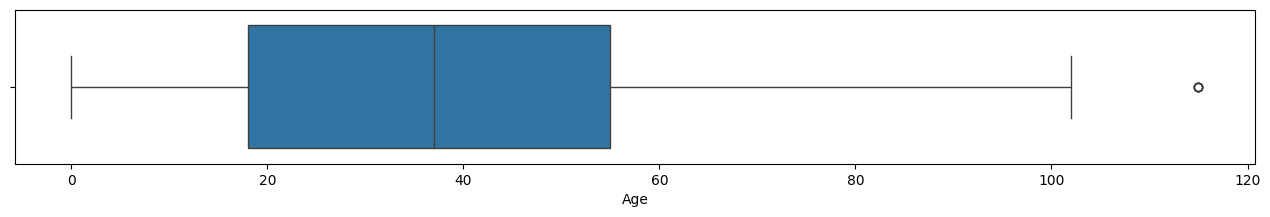

In [19]:
plt.figure(figsize=(16,2))
sns.boxplot(x=df.Age)

<Axes: xlabel='Age'>

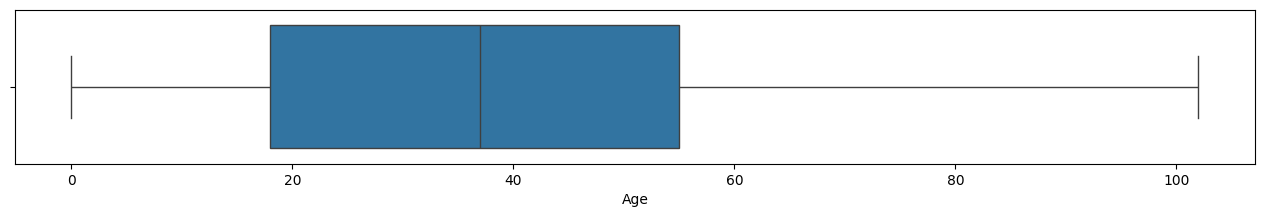

In [20]:
df = df[df.Age <= 110]
plt.figure(figsize=(16,2))
sns.boxplot(x=df.Age)

In [21]:
a = df[df["waiting_day"] == 0]["waiting_day"].value_counts()
b = df[(df["waiting_day"] == 0) & (df["No-show"] == 1)]["waiting_day"].value_counts()
b / a

waiting_day
0    0.046472
Name: count, dtype: float64

In [22]:
no_show = df[df["No-show"] == 1]
show = df[df["No-show"] == 0]

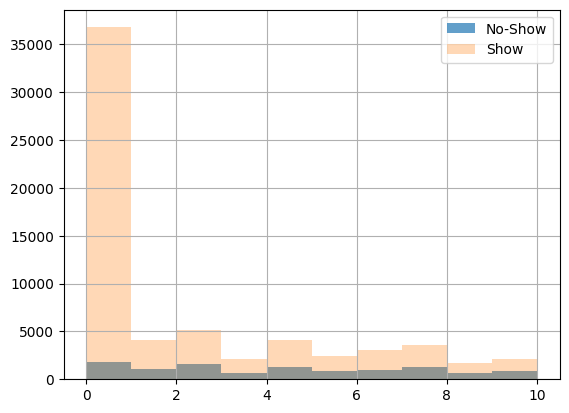

In [23]:

no_show[no_show["waiting_day"] <= 10]["waiting_day"].hist(alpha=0.7, label="No-Show")
show[show["waiting_day"] <= 10]["waiting_day"].hist(alpha=0.3, label="Show")
plt.legend()

<Axes: >

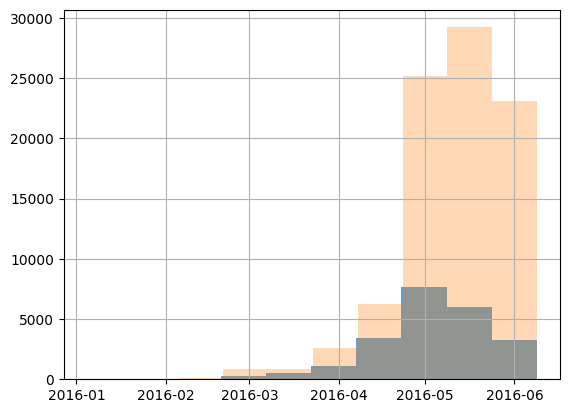

In [24]:
no_show["ScheduledDay"].hist(alpha=0.7, label="No-Show")
show["ScheduledDay"].hist(alpha=0.3, label="Show")

<Axes: >

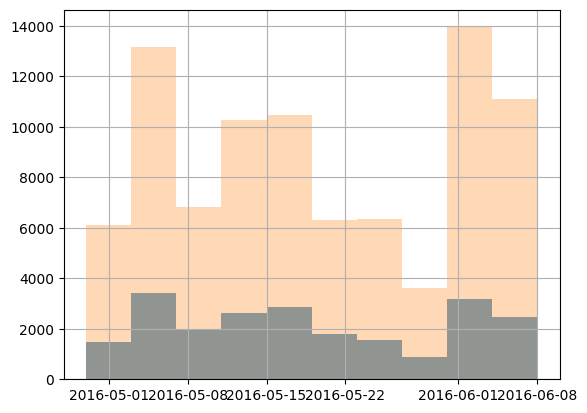

In [25]:
no_show["AppointmentDay"].hist(alpha=0.7, label="No-Show")
show["AppointmentDay"].hist(alpha=0.3, label="Show")

<Axes: >

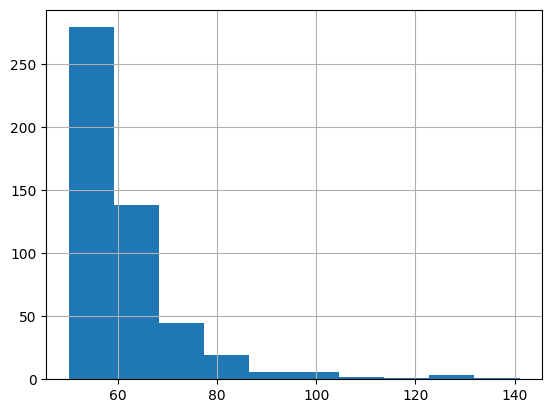

In [26]:
df.PatientId.value_counts().iloc[0:500].hist()

In [27]:
df.PatientId.value_counts().iloc[0:10]

PatientId
8.220000e+14    141
3.350000e+13    127
7.580000e+13    124
8.190000e+13    123
2.690000e+13    117
6.540000e+13    112
6.680000e+13    106
1.450000e+13    104
8.530000e+14    102
8.920000e+13    101
Name: count, dtype: int64

In [28]:
df.PatientId.value_counts().iloc[0:500]

PatientId
8.220000e+14    141
3.350000e+13    127
7.580000e+13    124
8.190000e+13    123
2.690000e+13    117
               ... 
2.830000e+12     50
1.520000e+13     50
2.960000e+12     50
1.490000e+13     50
9.930000e+14     50
Name: count, Length: 500, dtype: int64

In [29]:
df[(df['waiting_day']>50) & (df['No-show']==1)].PatientId.value_counts().iloc[0:10]

PatientId
3.380000e+14    6
7.250000e+13    4
7.850000e+13    4
8.340000e+12    4
4.970000e+12    3
9.150000e+14    3
5.670000e+12    3
5.290000e+12    3
9.630000e+14    3
8.460000e+12    3
Name: count, dtype: int64

<Axes: xlabel='SMS_received', ylabel='waiting_day'>

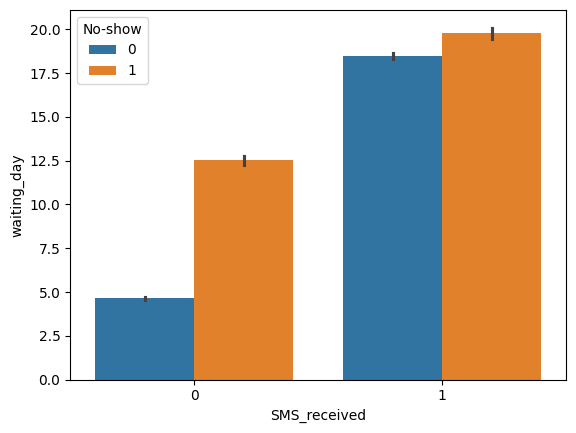

In [30]:
sns.barplot(y='waiting_day', x='SMS_received', hue='No-show', data=df)

In [31]:
a=len(df[(df['SMS_received']==0) & (df['No-show']==1)])
b=len(df[(df['SMS_received']==0) & (df['No-show']==0)])
print(f'SMS_received가 0일 때 노쇼: {a}')
print(f'SMS_received가 0일 때 쇼: {b}')
print(f'SMS_received가 0일 때 노쇼 비율: {a/(a+b)}')

SMS_received가 0일 때 노쇼: 12522
SMS_received가 0일 때 쇼: 62494
SMS_received가 0일 때 노쇼 비율: 0.1669243894635811
